# Data Analysis Project — WeRateDogs
# Gather 
### The data are collected from different 3 locations (Normal download, programmatically downloaded file, file from twitter API )

In [458]:
# import required libs

import requests
import pandas as pd
import tweepy
import json
import matplotlib.pyplot as plt
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
%matplotlib inline


In [461]:
# this is code for API however i did not use it to download the file 


# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_enhanced.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [462]:
# this is file which will be downloaded through request library
image_predictions_tsv_file_link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(image_predictions_tsv_file_link)
with open(image_predictions_tsv_file_link.split('/')[-1],mode='wb') as file:
    file.write(response.content)

In [463]:
df_twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
df_image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')

In [464]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
api_df_now = pd.DataFrame(df_list)


### 3 Datasets are : 
#### df_twitter_archive_enhanced
#### df_image_predictions
#### api_df_now

#
# Key Points
## Key points to keep in mind when data wrangling for this project:

### You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
### Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
### Cleaning includes merging individual pieces of data according to the rules of tidy data.
### The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
### You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

In [549]:
df_twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [550]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [551]:
api_df_now.head()

,tweet_id,retweet_count,favorite_count,user_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [552]:
df_twitter_archive_enhanced.shape

(2356, 17)

In [553]:
df_image_predictions.shape

(2075, 12)

In [554]:
api_df_now.shape

(2354, 4)

In [555]:

df_twitter_archive_enhanced.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [556]:
df_image_predictions.dtypes


tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [557]:
api_df_now.dtypes

tweet_id          int64
retweet_count     int64
favorite_count    int64
user_count        int64
dtype: object

In [558]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [559]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [560]:
api_df_now.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   user_count      2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


In [561]:
df_twitter_archive_enhanced.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [562]:
df_image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [563]:
api_df_now.nunique()

tweet_id          2354
retweet_count     1724
favorite_count    2007
user_count          66
dtype: int64

In [564]:
df_twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [565]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [566]:
api_df_now.describe()

,tweet_id,retweet_count,favorite_count,user_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01
min,6.660209e+17,0.000000,0.000000,3.200799e+06
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06


In [567]:
df_twitter_archive_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2113,670434127938719744,NaN,NaN,2015-11-28 02:48:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hank and Sully. Hank is very proud of the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670434127...,11,10,Hank,None,None,None,None
1965,673345638550134785,NaN,NaN,2015-12-06 03:38:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gerald. He's a fluffy lil yellow pup. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673345638...,7,10,Gerald,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None
1834,676121918416756736,NaN,NaN,2015-12-13 19:30:01 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a very excited dog. Cle...,NaN,NaN,NaN,https://vine.co/v/iZXg7VpeDAv,8,10,None,None,None,None,None
465,817181837579653120,NaN,NaN,2017-01-06 01:31:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a pupper with squeaky hi...,8.159661e+17,4.196984e+09,2017-01-02 17:00:46 +0000,https://twitter.com/dog_rates/status/815966073...,13,10,None,None,None,pupper,None
1220,714606013974974464,NaN,NaN,2016-03-29 00:12:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here are two lil cuddly puppers. Both 12/10 wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714606013...,12,10,None,None,None,None,None
2046,671520732782923777,NaN,NaN,2015-12-01 02:46:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Alejandro. He's an extremely seductive pu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671520732...,10,10,Alejandro,None,None,None,None
2234,668190681446379520,NaN,NaN,2015-11-21 22:14:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Skittles. I would kidnap Skittles. Pin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668190681...,12,10,Skittles,None,None,None,None
955,751598357617971201,NaN,NaN,2016-07-09 02:06:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. A cat got his tongue. 13/10 ador...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751598357...,13,10,Toby,None,None,None,None
906,758041019896193024,NaN,NaN,2016-07-26 20:47:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Teagan reads entire books in store so they're ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758041019...,9,10,None,None,None,None,None


In [569]:
df_image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1758,825535076884762624,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1,Rottweiler,0.681495,True,Tibetan_mastiff,0.147940,True,black-and-tan_coonhound,0.024525,True
656,682259524040966145,https://pbs.twimg.com/media/CXffar9WYAArfpw.jpg,1,Siberian_husky,0.439670,True,Eskimo_dog,0.340474,True,malamute,0.101253,True
1028,710997087345876993,https://pbs.twimg.com/media/Cd34FClUMAAnvGP.jpg,1,malamute,0.281260,True,Eskimo_dog,0.232641,True,Pembroke,0.091602,True
1685,814530161257443328,https://pbs.twimg.com/media/C03K2-VWIAAK1iV.jpg,1,miniature_poodle,0.626913,True,toy_poodle,0.265582,True,soft-coated_wheaten_terrier,0.041614,True
1929,858471635011153920,https://pbs.twimg.com/media/C-nnZBdXkAAB-wg.jpg,1,Pembroke,0.987407,True,Cardigan,0.008723,True,basenji,0.003424,True
186,669363888236994561,https://pbs.twimg.com/media/CUoO1TLWsAA0Z3w.jpg,1,golden_retriever,0.539004,True,Irish_setter,0.406550,True,cocker_spaniel,0.041484,True
105,667861340749471744,https://pbs.twimg.com/media/CUS4WJ-UsAEJj10.jpg,1,malamute,0.967275,True,Siberian_husky,0.016168,True,Eskimo_dog,0.011277,True
213,670040295598354432,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,web_site,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True
901,700002074055016451,https://pbs.twimg.com/media/CbboKP4WIAAw8xq.jpg,1,Chihuahua,0.369488,True,schipperke,0.243367,True,pug,0.161614,True
1305,753375668877008896,https://pbs.twimg.com/media/CnSHLFeWgAAwV-I.jpg,1,bluetick,0.360071,True,crutch,0.134816,False,tripod,0.098207,False


In [570]:
api_df_now.sample(10)

,tweet_id,retweet_count,favorite_count,user_count
270,841077006473256960,5991,24926,3200891
2130,670079681849372674,1373,2390,3201010
1654,683357973142474752,1059,3238,3200952
3,891689557279858688,8964,42908,3200889
1935,673919437611909120,401,1251,3201004
1471,693647888581312512,673,2961,3200950
193,855245323840757760,6568,0,3200891
283,838921590096166913,2357,12183,3200891
365,828801551087042563,3901,0,3200892
1872,675135153782571009,542,1398,3201003


In [571]:
df_twitter_archive_enhanced['name'].value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
             ... 
Timmy           1
Jeffri          1
Dwight          1
officially      1
Arlen           1
Name: name, Length: 957, dtype: int64

In [572]:
df_twitter_archive_enhanced.query('rating_denominator != 10')['rating_denominator']

313       0
342      15
433      70
516       7
784      11
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1598     20
1634    130
1635    110
1662     11
1663     16
1779    120
1843     80
2335      2
Name: rating_denominator, dtype: int64

In [573]:
df_twitter_archive_enhanced.query('rating_denominator != 10')['rating_denominator'].value_counts()

50     3
11     3
20     2
80     2
90     1
40     1
130    1
2      1
70     1
7      1
110    1
170    1
120    1
15     1
16     1
150    1
0      1
Name: rating_denominator, dtype: int64

In [574]:
df_twitter_archive_enhanced.query('rating_denominator != 10')['rating_denominator'].value_counts().sum()

23

In [548]:
df_twitter_archive_enhanced.query("retweeted_status_id != 'NaN'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


# Assessing Data

## Quality issues 

### There are 59 NAN value at df_twitter_archive_enhanced in in_reply_to_status_id expanded_urls  
### timestamp column need to be changed from object to datetime type
### retweeted_status_timestamp column need to be changed from object to datetime type
### in_reply_to_status_id column need to be changed to int64 type 
### in_reply_to_user_id column need to be changed to int64 type 
### retweeted_status_id column need to be changed to int64 type 
### retweeted_status_user_id column need to be changed to int64 type  
### 55 incorrect names in 'name' column under name 'a'
### 23 incorrect rating denominator - not equel 10 
### 181 duplicate  rows where tweet are retweeted again > df_twitter_archive_enhanced.query("retweeted_status_id != 'NaN'")
### invalid rating for ['680494726643068929', '778027034220126208', '786709082849828864', '835246439529840640']



## Tidiness issues 

### one variable 'dog stage' is represented at four columns [doggo,floofer, pupper, puppo ] 
### the shape of df_twitter_archive_enhanced is different that api_df_now
### source column at  df_twitter_archive_enhanced dataframe is not useful 




In [526]:
# Take Copy to work on and keep the orginal as it is 

df_image_predictions_cleaned = df_image_predictions.copy()
api_df_now_cleaned = api_df_now.copy()
df_twitter_archive_enhanced_cleaned = df_twitter_archive_enhanced.copy()

# Clean
### Fixing quality issues 

## Define: 
### Convert date to datetime data type 


In [527]:
df_twitter_archive_enhanced_cleaned['timestamp'] = pd.to_datetime(df_twitter_archive_enhanced_cleaned['timestamp'])
df_twitter_archive_enhanced_cleaned['retweeted_status_timestamp'] = pd.to_datetime(df_twitter_archive_enhanced_cleaned['retweeted_status_timestamp'])


## Test

In [575]:
df_twitter_archive_enhanced_cleaned['timestamp'].dtype

datetime64[ns, UTC]

In [576]:
df_twitter_archive_enhanced_cleaned['retweeted_status_timestamp'].dtype

datetime64[ns, UTC]

## Define:
### in_reply_to_status_id column need to be changed to int64 type 
### in_reply_to_user_id column need to be changed to int64 type 
### retweeted_status_id column need to be changed to int64 type 
### retweeted_status_user_id column need to be changed to int64 type 

In [528]:

df_twitter_archive_enhanced_cleaned['in_reply_to_status_id'] = df_twitter_archive_enhanced_cleaned['in_reply_to_status_id'].astype(dtype= 'Int64')
df_twitter_archive_enhanced_cleaned['in_reply_to_user_id'] = df_twitter_archive_enhanced_cleaned['in_reply_to_user_id'].astype(dtype= 'Int64')
df_twitter_archive_enhanced_cleaned['retweeted_status_id'] = df_twitter_archive_enhanced_cleaned['retweeted_status_id'].astype(dtype= 'Int64')
df_twitter_archive_enhanced_cleaned['retweeted_status_user_id'] = df_twitter_archive_enhanced_cleaned['retweeted_status_user_id'].astype(dtype= 'Int64')


## Test

In [577]:
df_twitter_archive_enhanced_cleaned['in_reply_to_status_id'].dtype

Int64Dtype()

In [578]:
df_twitter_archive_enhanced_cleaned['in_reply_to_user_id'].dtype

Int64Dtype()

In [579]:
df_twitter_archive_enhanced_cleaned['retweeted_status_id'].dtype

Int64Dtype()

In [580]:
df_twitter_archive_enhanced_cleaned['retweeted_status_user_id'].dtype

Int64Dtype()

## Define:
### 55 incorrect names in 'name' column under name 'a'

In [529]:
df_twitter_archive_enhanced_cleaned["name"].replace({"a": "None"}, inplace=True)

## Test

In [581]:
df_twitter_archive_enhanced_cleaned["name"].value_counts()

None        718
Lucy         11
Charlie      11
Cooper       10
Oliver       10
           ... 
Storkson      1
Mona          1
Bilbo         1
Dante         1
Arlen         1
Name: name, Length: 952, dtype: int64

## Define:
### 23 incorrect rating denominator - not equel 10 - since it is only 23 rows so I will drop them


In [530]:
df_twitter_archive_enhanced_cleaned = df_twitter_archive_enhanced_cleaned[df_twitter_archive_enhanced['rating_denominator'] == 10] 

## Test: 

In [583]:
df_twitter_archive_enhanced_cleaned.query("rating_denominator != 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,user_count


## Define: 
### 181 duplicate  rows where tweet are retweeted again > df_twitter_archive_enhanced.query("retweeted_status_id != 'NaN'")


In [531]:
temp = df_twitter_archive_enhanced.query("retweeted_status_id != 'NaN'")['retweeted_status_id'].astype(dtype="int64")
l_1d = temp.values.tolist()
for l in l_1d:
    
    if l in df_twitter_archive_enhanced.values:
       
        df_twitter_archive_enhanced_cleaned.drop(df_twitter_archive_enhanced_cleaned[df_twitter_archive_enhanced_cleaned['retweeted_status_id'] == l].index, inplace = True)

## Test

In [608]:
df_twitter_archive_enhanced_cleaned['retweeted_status_id'].nunique()

0

## Define 
### invalid rating for ['680494726643068929', '778027034220126208', '786709082849828864', '835246439529840640']

In [532]:

df_twitter_archive_enhanced_cleaned.loc[df_twitter_archive_enhanced_cleaned['tweet_id'] == 680494726643068929, 'rating_numerator'] = 11

In [ ]:
df_twitter_archive_enhanced_cleaned.loc[df_twitter_archive_enhanced_cleaned['tweet_id'] == 778027034220126208, 'rating_numerator'] = 11

In [ ]:
df_twitter_archive_enhanced_cleaned.loc[df_twitter_archive_enhanced_cleaned['tweet_id'] == 786709082849828864, 'rating_numerator'] = 9


In [ ]:
# 835246439529840640 removed from pervious operation

## Test

In [609]:
df_twitter_archive_enhanced_cleaned.query('tweet_id == 680494726643068929')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,user_count
1712,680494726643068929,<NA>,<NA>,2015-12-25 21:06:00+00:00,Here we have uncovered an entire battalion of ...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/680494726...,11,10,None,,542,1879,3200953


In [610]:
df_twitter_archive_enhanced_cleaned.query('tweet_id == 778027034220126208')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,user_count
763,778027034220126208,<NA>,<NA>,2016-09-20 00:24:34+00:00,This is Sophie. She's a Jubilant Bush Pupper. ...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/778027034...,11,10,Sophie,pupper,1885,7320,3200810


In [611]:
df_twitter_archive_enhanced_cleaned.query('tweet_id == 786709082849828864')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,user_count
695,786709082849828864,<NA>,<NA>,2016-10-13 23:23:56+00:00,"This is Logan, the Chow who lived. He solemnly...",<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/786709082...,9,10,Logan,,7069,20296,3200901


### Fixing tidiness issues

## Define 
###  source column at  df_twitter_archive_enhanced dataframe is not useful 

In [533]:

df_twitter_archive_enhanced_cleaned.drop("source",axis=1,inplace=True)

## Test

In [612]:

df_twitter_archive_enhanced_cleaned.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'retweet_count',
       'favorite_count', 'user_count'],
      dtype='object')

## Define 
### one variable 'dog stage' is represented in four columns [doggo,floofer, pupper, puppo ] 


In [534]:

df_twitter_archive_enhanced_cleaned['stage']=None
df_twitter_archive_enhanced_cleaned['stage'] = df_twitter_archive_enhanced_cleaned.doggo + df_twitter_archive_enhanced_cleaned.floofer + df_twitter_archive_enhanced_cleaned.pupper + df_twitter_archive_enhanced_cleaned.puppo
df_twitter_archive_enhanced_cleaned['stage'] = df_twitter_archive_enhanced_cleaned['stage'].map(lambda x: x.replace("None",""))
df_twitter_archive_enhanced_cleaned.loc[df_twitter_archive_enhanced_cleaned.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_twitter_archive_enhanced_cleaned.loc[df_twitter_archive_enhanced_cleaned.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_twitter_archive_enhanced_cleaned.loc[df_twitter_archive_enhanced_cleaned.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'
df_twitter_archive_enhanced_cleaned.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)

## Test

In [614]:
df_twitter_archive_enhanced_cleaned.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,user_count
1531,690015576308211712,<NA>,<NA>,2016-01-21 03:38:27+00:00,This pupper can only sleep on shoes. It's a cr...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/690015576...,12,10,None,pupper,836,2740,3200951
864,762464539388485633,<NA>,<NA>,2016-08-08 01:44:46+00:00,This is Buddy. His father was a bear and his m...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/762464539...,12,10,Buddy,,4839,11503,3200908
810,771380798096281600,<NA>,<NA>,2016-09-01 16:14:48+00:00,Meet Fizz. She thinks love is a social constru...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/771380798...,11,10,Fizz,,5912,11746,3200905
297,837110210464448512,<NA>,<NA>,2017-03-02 01:20:01+00:00,This is Clark. He passed pupper training today...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/837110210...,13,10,Clark,pupper,2731,17480,3200891
17,888804989199671297,<NA>,<NA>,2017-07-22 16:56:37+00:00,This is Zeke. He has a new stick. Very proud o...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/888804989...,13,10,Zeke,,4559,26080,3200889
2050,671497587707535361,<NA>,<NA>,2015-12-01 01:14:35+00:00,This is Pip. He is a ship captain. Many years ...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/671497587...,11,10,Pip,,481,980,3201007
2042,671538301157904385,<NA>,<NA>,2015-12-01 03:56:22+00:00,This is Baxter. He's very calm. Hasn't eaten i...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/671538301...,8,10,Baxter,,436,993,3201007
1887,674788554665512960,<NA>,<NA>,2015-12-10 03:11:43+00:00,Say hello to Maggie. She's a Western Septic Do...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/674788554...,9,10,Maggie,,230,871,3201004
1657,683142553609318400,<NA>,<NA>,2016-01-02 04:27:31+00:00,Meet Brandy. She's a member of the Bloods. Men...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/683142553...,9,10,Brandy,pupper,1173,3162,3200952
1901,674646392044941312,<NA>,<NA>,2015-12-09 17:46:48+00:00,Two gorgeous dogs here. Little waddling dog is...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/674646392...,5,10,None,,557,1533,3201003


## Define
### the shape of df_twitter_archive_enhanced is different that api_df_now , we will do this by merge ['retweet_count', 'favorite_count', 'user_count'] into df_twitter_archive_enhanced_cleaned
### by then we will have only two datafreams 

In [535]:
df_twitter_archive_enhanced_cleaned['retweet_count'] = 'NaN'
df_twitter_archive_enhanced_cleaned['favorite_count'] = 'NaN'
df_twitter_archive_enhanced_cleaned['user_count'] = 'NaN'
for tweet in df_twitter_archive_enhanced_cleaned['tweet_id']:
    if tweet in api_df_now_cleaned.values:
         i = api_df_now_cleaned.index[api_df_now_cleaned['tweet_id'] == tweet].tolist()[0]
         v_retweet_count = api_df_now_cleaned.iloc[i]['retweet_count']
         v_favorite_count = api_df_now_cleaned.iloc[i]['favorite_count']
         v_user_count = api_df_now_cleaned.iloc[i]['user_count']

         df_twitter_archive_enhanced_cleaned.loc[df_twitter_archive_enhanced_cleaned['tweet_id'] == tweet, 'retweet_count'] = v_retweet_count

         df_twitter_archive_enhanced_cleaned.loc[df_twitter_archive_enhanced_cleaned['tweet_id'] == tweet, 'favorite_count'] = v_favorite_count

         df_twitter_archive_enhanced_cleaned.loc[df_twitter_archive_enhanced_cleaned['tweet_id'] == tweet, 'user_count'] = v_user_count

## Test

In [615]:
df_twitter_archive_enhanced_cleaned.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,user_count
2107,670465786746662913,<NA>,<NA>,2015-11-28 04:54:34+00:00,Silly dog here. Wearing bunny ears. Nice long ...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/670465786...,7,10,None,,608,1048,3201009
527,808733504066486276,<NA>,<NA>,2016-12-13 18:01:07+00:00,Here's a pupper in a onesie. Quite pupset abou...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/808733504...,12,10,None,pupper,2509,8784,3200896
678,789268448748703744,<NA>,<NA>,2016-10-21 00:53:56+00:00,This is Stella. She's happier than I will ever...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/789268448...,10,10,Stella,,3014,10196,3200901
494,813187593374461952,<NA>,<NA>,2016-12-26 01:00:05+00:00,We only rate dogs. Please don't send in other ...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/813187593...,13,10,None,,5096,22085,3200895
842,766793450729734144,<NA>,<NA>,2016-08-20 00:26:19+00:00,This is Rufus. He just missed out on the 100m ...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/766793450...,10,10,Rufus,,1565,5650,3200906
514,811627233043480576,<NA>,<NA>,2016-12-21 17:39:46+00:00,This is Augie. He's a savage. Doesn't give a h...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/811627233...,10,10,Augie,,3650,14265,3200895
2192,668932921458302977,<NA>,<NA>,2015-11-23 23:23:31+00:00,This is Herald. He likes to swing. Subtle tong...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/668932921...,9,10,Herald,,63,284,3201014
1123,730427201120833536,<NA>,<NA>,2016-05-11 15:59:50+00:00,This is Crystal. She's flawless. Really wants ...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/730427201...,11,10,Crystal,,1176,3809,3200944
652,792394556390137856,<NA>,<NA>,2016-10-29 15:55:58+00:00,Meet BeBe. She rocks the messy bun of your dre...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/792394556...,12,10,BeBe,,4998,15128,3200901
1208,715704790270025728,<NA>,<NA>,2016-04-01 00:58:13+00:00,This is Bentley. He gives kisses back. 11/10 p...,<NA>,<NA>,NaT,https://vine.co/v/ijAlDnuOD0l,11,10,Bentley,,634,3055,3200945


## Save cleaned datasets 

### I am not going to merage both sets togathe as I want to keep "df_image_predictions_cleaned" to be for dogs breeds predictions and I can add more tweets or data from other source so finally this data will be for predictions only and it could contain picutre without tweet . 

In [542]:
df_image_predictions_cleaned.to_csv('df_image_predictions_cleaned.csv', index=False)
df_twitter_archive_enhanced_cleaned.to_csv('df_twitter_archive_enhanced_cleaned.csv', index=False)

# Analyzing
### 1) What is the most Popular Dog Breeds ? 

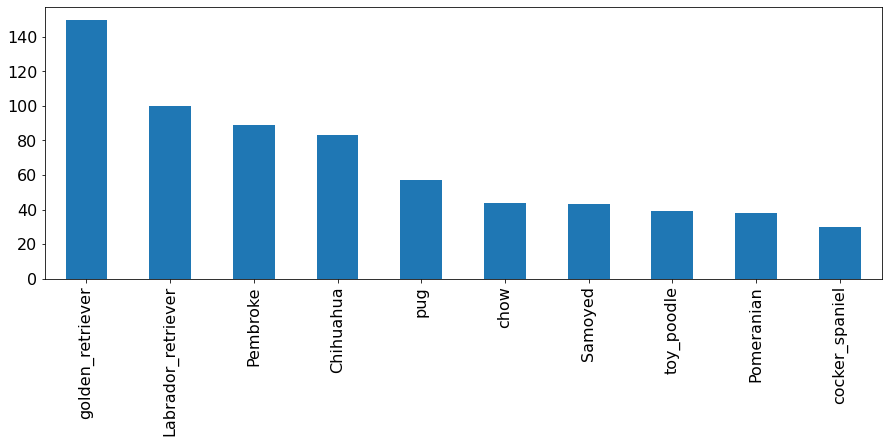

In [536]:
# What is the most Popular Dog Breeds
n = 10
breeds_list = df_image_predictions_cleaned['p1'].value_counts()[:n].index.tolist()
df_breeds = df_image_predictions_cleaned[df_image_predictions_cleaned['p1'].isin(breeds_list)]
df_breeds['p1'].value_counts().plot(kind='bar', figsize=(15,5), fontsize=16)


### We can see from bars that the most popular dog breeds is "golden_retriever"

### 2) What are the most common dog names ?

In [537]:
# What are the most common dog names

df_twitter_archive_enhanced_cleaned['name'].value_counts().max

<bound method Series.max of None        718
Lucy         11
Charlie      11
Cooper       10
Oliver       10
           ... 
Storkson      1
Mona          1
Bilbo         1
Dante         1
Arlen         1
Name: name, Length: 952, dtype: int64>

###  We can see that the most common names are "Charlie", "Lucy", "Cooper"

### 3) What is the most common stage of dogs ? 

In [538]:
# What are the most common stage of dogs
df_twitter_archive_enhanced_cleaned['stage'].value_counts().max

<bound method Series.max of                   1809
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64>

### We can see that the most common stage is "Pupper"

### 4) What is the average rating numerator value ?  

In [539]:

df_twitter_archive_enhanced_cleaned.rating_numerator.value_counts().sort_index()


0         2
1         7
2         9
3        19
4        15
5        36
6        32
7        53
8        98
9       156
10      442
11      427
12      500
13      307
14       43
15        1
17        1
182       1
420       2
666       1
1776      1
Name: rating_numerator, dtype: int64

### we can see that 12 is most common value for rating 

### 5) What is the most common hour to tweet ? 

In [541]:
df_twitter_archive_enhanced_cleaned['timestamp'].apply(lambda x:x.strftime('%H')).value_counts().sort_index()


00    268
01    292
02    222
03    187
04    103
05     28
06      4
12      2
13      3
14      9
15     97
16    204
17    174
18    112
19     94
20     87
21     76
22     75
23    116
Name: timestamp, dtype: int64

In [ ]:
### 1 AM is most hour the tweets being tweeted 